In [100]:
import numpy as np

reads = np.load('../split_gen_gvcf/chr.22.AU1274.AU1274202.AU1274201.gen.npy')

In [101]:
print(reads.shape)
print(type(reads))
# individual, position, allele depth
# alleles broken down by Ref, A, C, G, T, Del


(7, 51304566, 6)
<class 'numpy.ndarray'>


In [102]:
num_reads = np.sum(reads[:, :, 1:], axis=(0, 2))
print(np.sum(num_reads > 0))

219751


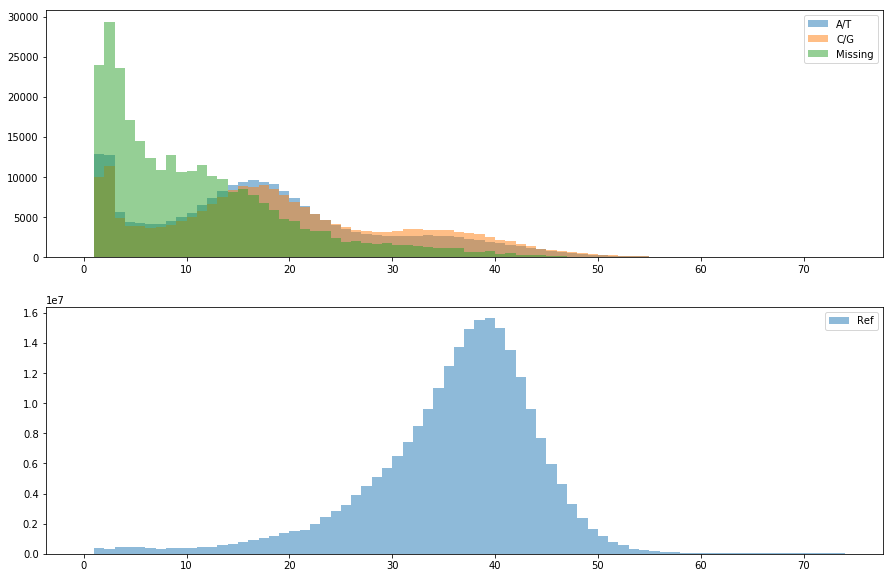

In [103]:
import matplotlib.pyplot as plt
import math

base = 1.4
max_length = 75
min_length = 0

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
v = reads[:, :, (1, 4)]
plt.hist(v[v != 0], label='A/T', alpha=0.5, bins=range(min_length, max_length, 1))
v = reads[:, :, (2, 3)]
plt.hist(v[v != 0], label='C/G', alpha=0.5, bins=range(min_length, max_length, 1))
v = reads[:, :, 5]
plt.hist(v[v != 0], label='Missing', alpha=0.5, bins=range(min_length, max_length, 1))   
plt.legend()

plt.subplot(2, 1, 2)
v = reads[:, :, 0]
plt.hist(v[v != 0], label='Ref', alpha=0.5, bins=range(min_length, max_length, 1))  
plt.legend()

plt.show()

In [104]:
total_reads = np.sum(reads, axis=2)

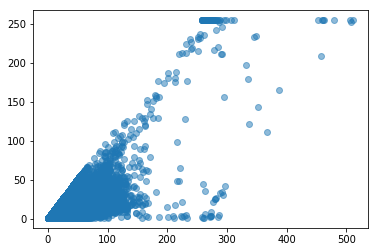

In [105]:
v = reads[:, :, 1]
indices = (v != 0)
a = v[indices]/total_reads[indices]

plt.scatter(total_reads[indices], v[indices], label='A', alpha=0.5)
plt.show()

In [106]:
print(v.shape, total_reads.shape)
print(np.min(a), np.max(a))

(7, 51304566) (7, 51304566)
0.0038314176245210726 1.0


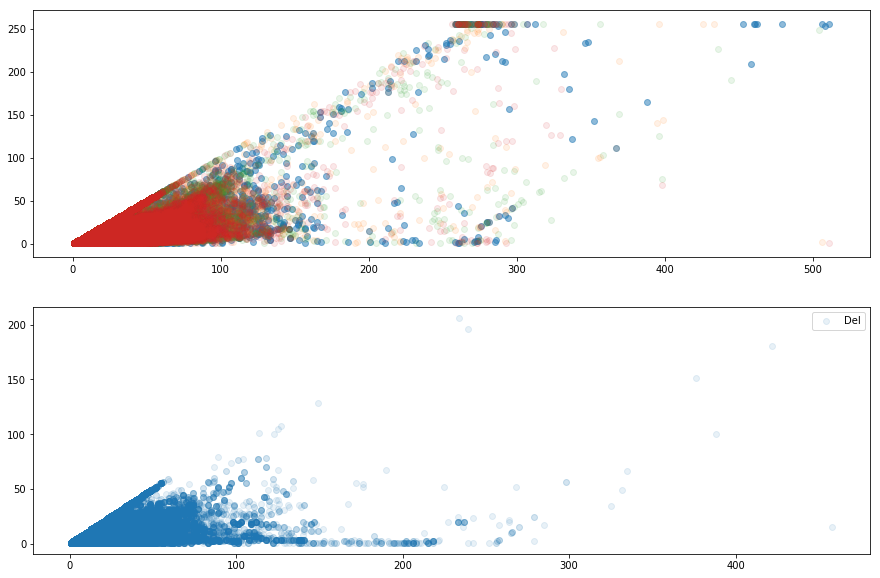

In [107]:
import matplotlib.pyplot as plt
import math

bin_size = 0.01

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)

v = reads[:, :, 1]
indices = (v != 0)
#plt.hist(v[indices]/total_reads[indices], label='A', alpha=0.5, bins=np.arange(0, 1, bin_size))
plt.scatter(total_reads[indices], v[indices], label='A', alpha=0.5)

v = reads[:, :, 2]
indices = (v != 0)
#plt.hist(v[indices]/total_reads[indices], label='C', alpha=0.5, bins=np.arange(0, 1, bin_size))
plt.scatter(total_reads[indices], v[indices], label='C', alpha=0.1)

v = reads[:, :, 3]
indices = (v != 0)
#plt.hist(v[indices]/total_reads[indices], label='G', alpha=0.5, bins=np.arange(0, 1, bin_size))
plt.scatter(total_reads[indices], v[indices], label='G', alpha=0.1)

v = reads[:, :, 4]
indices = (v != 0)
#plt.hist(v[indices]/total_reads[indices], label='T', alpha=0.5, bins=np.arange(0, 1, bin_size))
plt.scatter(total_reads[indices], v[indices], label='T', alpha=0.1)

plt.subplot(2, 1, 2)
v = reads[:, :, 5]
indices = (v != 0)
#plt.hist(v[indices]/total_reads[indices], label='Del', alpha=0.5, bins=np.arange(0, 1, bin_size))
plt.scatter(total_reads[indices], v[indices], label='Del', alpha=0.1)
plt.legend()

#plt.subplot(2, 1, 2)
#v = reads[:, :, 0]
#plt.hist(v[v != 0], label='Ref', alpha=0.5, bins=range(min_length, max_length, 1))  
#plt.legend()

plt.show()

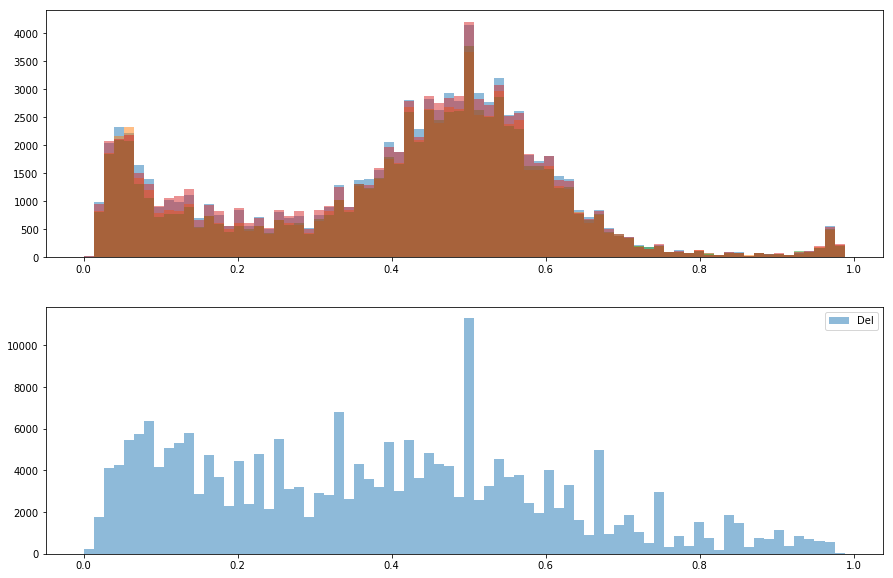

In [119]:
import matplotlib.pyplot as plt
import math

bin_size = 0.013

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)

v = reads[:, :, 1]
indices = (v != 0)
plt.hist(v[indices]/total_reads[indices], label='A', alpha=0.5, bins=np.arange(0, 1, bin_size))

v = reads[:, :, 2]
indices = (v != 0)
plt.hist(v[indices]/total_reads[indices], label='C', alpha=0.5, bins=np.arange(0, 1, bin_size))

v = reads[:, :, 3]
indices = (v != 0)
plt.hist(v[indices]/total_reads[indices], label='G', alpha=0.5, bins=np.arange(0, 1, bin_size))

v = reads[:, :, 4]
indices = (v != 0)
plt.hist(v[indices]/total_reads[indices], label='T', alpha=0.5, bins=np.arange(0, 1, bin_size))

plt.subplot(2, 1, 2)
v = reads[:, :, 5]
indices = (v != 0)
plt.hist(v[indices]/total_reads[indices], label='Del', alpha=0.5, bins=np.arange(0, 1, bin_size))
plt.legend()

#plt.subplot(2, 1, 2)
#v = reads[:, :, 0]
#plt.hist(v[v != 0], label='Ref', alpha=0.5, bins=range(min_length, max_length, 1))  
#plt.legend()

plt.show()

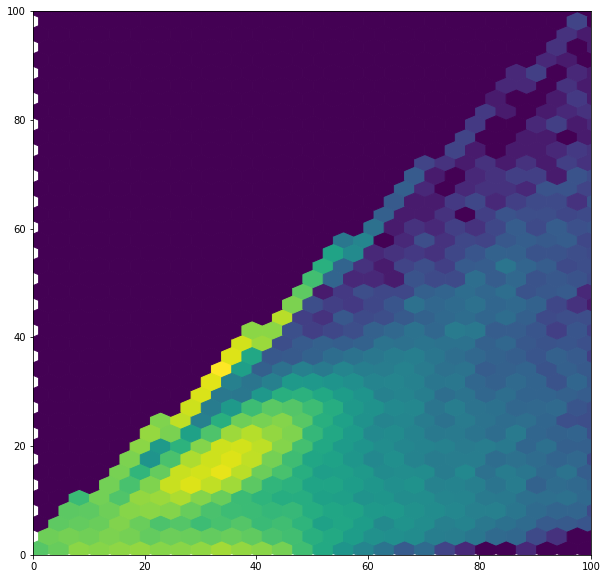

In [128]:
plt.figure(figsize=(10, 10))
v = np.sum(reads[:, :, 1:5], axis=2)
indices = (v != 0)
plt.hexbin(total_reads[indices], v[indices], bins='log', gridsize=140)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

In [108]:
#rep_indices = np.where(np.any(reads[:, 1:, :]!=reads[:, :-1, :], axis=(0, 2)))[0]
rep_indices = np.where(np.any(reads[:, :, 1:] != 0, axis=(0, 2)))[0]
print(rep_indices.shape)
#mult_factor = [rep_indices[0]+1] + (rep_indices[1:]-rep_indices[:-1]).tolist() + [family_genotypes.shape[1]-rep_indices[-1]-1]
#family_snp_positions = np.zeros((rep_indices.shape[0]+1, 2), dtype=int)
#family_snp_positions[1:, 0] = snp_positions[(rep_indices+1)]
#family_snp_positions[0, 0] = snp_positions[0]
#family_snp_positions[:-1, 1] = snp_positions[rep_indices]
#family_snp_positions[-1, 1] = snp_positions[-1]
#rep_indices = rep_indices.tolist()
#rep_indices.append(family_genotypes.shape[1]-1)
#n = len(rep_indices)

(219751,)


In [109]:
6148857
275321
219751

219751

In [112]:

print(reads[:, 34560000, :])

[[46  0  0  0  0  0]
 [45  0  0  0  0  0]
 [45  0  0  0  0  0]
 [31  0  0  0  0  0]
 [41  0  0  0  0  0]
 [32  0  0  0  0  0]
 [36  0  0  0  0  0]]


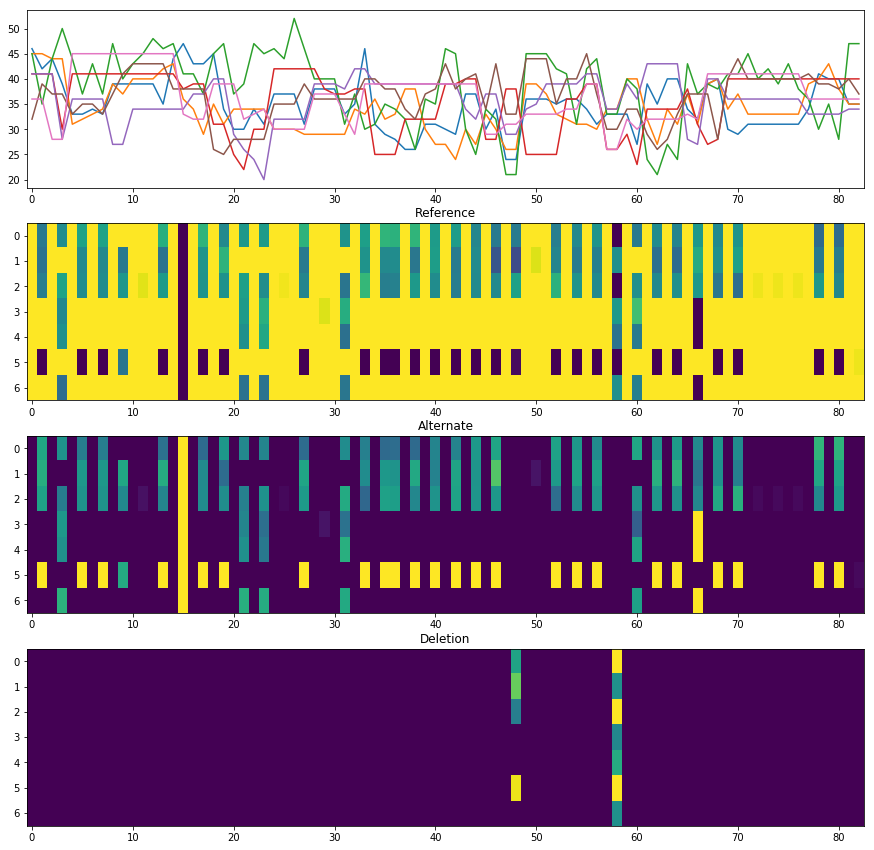

In [113]:
#segment = reads[:, 34567800:34569000, :]
segment = reads[:, 34560000:34570000, :]
tr_segment = total_reads[:, 34560000:34570000]
norm_segment = segment/tr_segment[:, :, np.newaxis]
indices = np.any(norm_segment[:, 1:, :] !=norm_segment[:, :-1, :], axis=(0, 2))
segment = segment[:, :-1, :][:, indices, :]
norm_segment = norm_segment[:, :-1, :][:, indices, :]

plt.figure(figsize=(15, 15))

ax1 = plt.subplot(4, 1, 1)
for i in range(segment.shape[0]):
    plt.plot(tr_segment[i, :-1][indices])

plt.subplot(4, 1, 2, sharex=ax1)
plt.title('Reference')
plt.imshow(norm_segment[:, :, 0], aspect='auto', vmin=0, vmax=1)

plt.subplot(4, 1, 3, sharex=ax1)
plt.title('Alternate')
plt.imshow(np.sum(norm_segment[:, :, 1:5], axis=2), aspect='auto', vmin=0, vmax=1)

plt.subplot(4, 1, 4, sharex=ax1)
plt.title('Deletion')
plt.imshow(norm_segment[:, :, 5], aspect='auto', vmin=0, vmax=1)

plt.show()

In [176]:
fam_reads = np.sum(reads, axis=0)
s = np.sum(fam_reads>0, axis=1)

[0 1 2 3 4 5] [16811931 34282125   206279     4159       70        2]


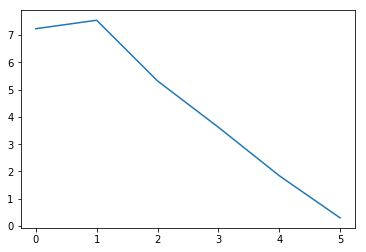

In [177]:
v, c = np.unique(s, return_counts=True)
print(v, c)
plt.plot(v, np.log10(c))
plt.show()

In [178]:
compressed_indices = np.where(np.any(reads[:, 1:, :] != reads[:, :-1, :], axis=(0, 2)))[0]
compressed_reads = reads[:, compressed_indices, :]
compressed_fam_reads = np.sum(compressed_reads, axis=0)
s = np.sum(compressed_fam_reads>0, axis=1)

[0 1 2 3 4 5] [    444 5975081  169460    4131      70       2]


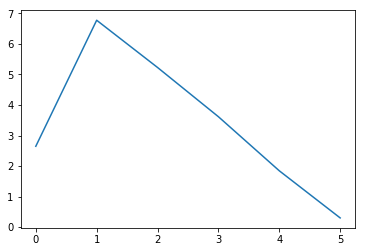

In [179]:
v, c = np.unique(s, return_counts=True)
print(v, c)
plt.plot(v, np.log10(c))
plt.show()

In [170]:
print(np.where(s>=2)[0])

[16060516 16069782 16069783 ... 51198313 51203288 51225128]


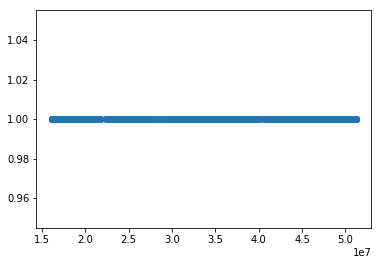

In [161]:
g = np.where(s>=2)[0]
plt.plot(g, np.ones(g.shape), 'o')
plt.show()

In [146]:
print(fam_reads[g, :])
print(g[13])

[[ 349    2   68    1    0    0]
 [ 161   15    0    1  132    0]
 [ 277    3   36    0    4    0]
 [ 375    3    0    5    5   15]
 [ 350    5    5    4    0    4]
 [ 106   14 1194  549    0    0]
 [1602    6  493    3    0    0]
 [  49    1    0  769    2    0]
 [  22    4   94  632    0    0]
 [ 210    2    0    6  443    0]
 [ 360   19    9    0  316    0]
 [ 152   10    1    0    3    0]
 [  95    2 1211    0    1    0]
 [1148    0  389  197  138    0]
 [1270    0    5  137  105    0]
 [ 349   51    1    1    0    0]
 [ 106    2    3    5    0    0]
 [ 194    1    1    2    0    0]
 [  74    0    1   37    1    0]
 [  60    0    2  265    1    0]]
18884028


In [150]:
print(reads[:, 18884028, :])

[[255   0   0  83   0   0]
 [ 11   0 255   0   0   0]
 [ 16   0 134   0   0   0]
 [222   0   0   0  19   0]
 [166   0   0   0  51   0]
 [223   0   0  39   0   0]
 [255   0   0  75  68   0]]


In [184]:
from os import listdir
from scipy import sparse

data_dir = '../split_gen_miss'
chrom = '22'
gen_files = sorted([f for f in listdir(data_dir) if ('chr.%s' % chrom) in f and 'gen.npz' in f])
whole_chrom = sparse.hstack([sparse.load_npz('%s/%s' % (data_dir, gen_file)) for gen_file in gen_files])


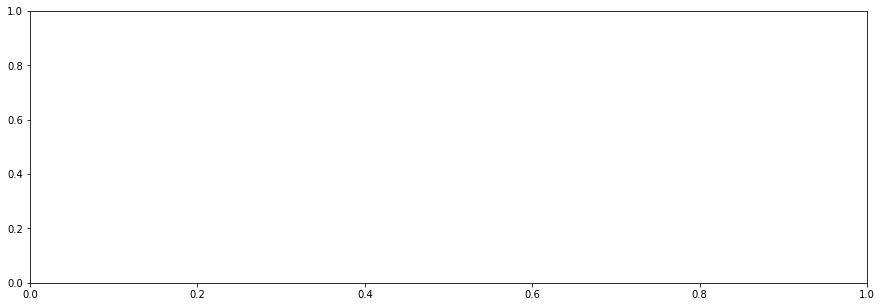

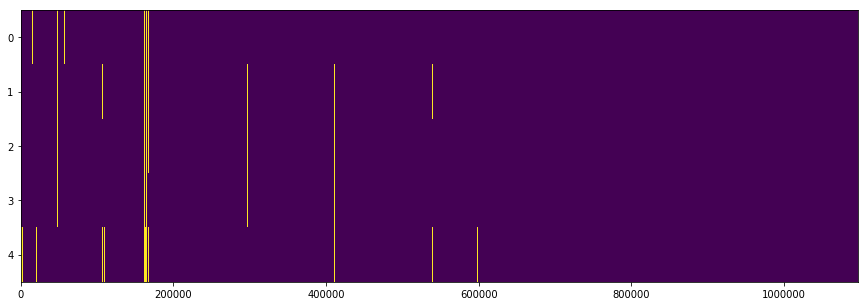

In [186]:
plt.figure(figsize=(15, 5))
plt.imshow(whole_chrom.A[:5, :]==-2, aspect='auto', vmin=0, vmax=1)
plt.show()